In [2]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'c:\\Users\\User\\Desktop\\Internship files\\Customer Dataset\\Processed and Analysed Dataset'

In [4]:
for file, folder, subfolder in os.walk('c:\\Users\\User\\Desktop\\Internship files\\Customer Dataset'):

    print(file)
    print(folder)
    print(subfolder)

c:\Users\User\Desktop\Internship files\Customer Dataset
['Processed and Analysed Dataset', 'Unprocessed Dataset']
[]
c:\Users\User\Desktop\Internship files\Customer Dataset\Processed and Analysed Dataset
['Processed_Data']
['Untitled-1.ipynb']
c:\Users\User\Desktop\Internship files\Customer Dataset\Processed and Analysed Dataset\Processed_Data
[]
['unclean_customer_data.csv']
c:\Users\User\Desktop\Internship files\Customer Dataset\Unprocessed Dataset
[]
['archive (2).zip']


In [5]:
file = zipfile.ZipFile('c:\\Users\\User\\Desktop\\Internship files\\Customer Dataset\\Unprocessed Dataset\\archive (2).zip')

In [6]:
file.extractall("Processed_Data")

In [7]:
customer_data = pd.read_csv('c:\\Users\\User\\Desktop\\Internship files\\Customer Dataset\\Processed and Analysed Dataset\\Processed_Data\\unclean_customer_data.csv')

In [8]:
customer_data.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077


In [ ]:
# Business Problem And Business Goals
 # The company is having issue choosing the best marketting method or focus for thier product so they want to know what age group they should focus the advertisement on to
 # Generat more sales and Income 


# Questions
    # 1. What is the Age Group With The Highest overall spending_score and The Average spending_Score of these Age groups
    # 2. WHat is the Average Purchase Frequency Of this Age group And the Average Income of the age groups with the highest overall Transaction_amount and the average Transaction
    # amount

In [10]:
# Checking For The length of the dataset i am working with

customer_data.shape

(10200, 6)

In [11]:
# Checking for the data type of the dataset i am working with


customer_data.dtypes

Customer_ID             int64
Age                   float64
Annual_Income         float64
Spending_Score        float64
Purchase_Frequency      int64
Transaction_Amount    float64
dtype: object

In [12]:
customer_data = customer_data.drop_duplicates()

In [13]:
customer_data.shape

(10000, 6)

In [14]:
customer_data_missing_values = customer_data[customer_data.isnull().any(axis= 1)]


In [15]:
customer_data_missing_values.sort_values("Age", ascending= False).head(5)

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
9015,2233,61.0,27882.308742,2.163895,22,NaN
9219,4660,60.0,41952.983751,25.974191,28,NaN
70,5887,60.0,63505.853499,60.207529,2,NaN
179,9958,59.0,63008.347635,63.052165,4,NaN
8962,6327,57.0,62668.297260,62.933753,20,NaN


In [16]:
# Checkin for missin values in the age and the transactions amount columns

customer_data_missing_values_age = customer_data[customer_data["Age"].isnull()]
customer_data_missing_values_customer_id = customer_data[customer_data["Customer_ID"].isnull()]
customer_data_missing_values_transaction_Amount = customer_data[customer_data["Transaction_Amount"].isnull()]



print(f"There Are {len(customer_data_missing_values_age)} Customers with NO Age filled")
print(f"There are {len(customer_data_missing_values_transaction_Amount)} customers with no Transaction amount recorded \nThis can skew the result of our analysis")
print(f"There Are {len(customer_data_missing_values_customer_id)} Customers with missin customer id")

There Are 250 Customers with NO Age filled
There are 250 customers with no Transaction amount recorded 
This can skew the result of our analysis
There Are 0 Customers with missin customer id


In [17]:
# Changing the columns data type into the right format for analysis
# Keep in mind that customers with Age 0 did not provide thier age, 

customer_data["Age"] = customer_data["Age"].astype(str)



def split(name):

    name = name.split(".")[0]

    return name



customer_data["Age"] = customer_data["Age"].apply(split)


customer_data["Age"] = customer_data["Age"].replace("nan","0")
customer_data["Age"] = customer_data["Age"].astype(int)
customer_data["Age"].unique()

array([31, 48, 17, 34, 44, 41, 45, 55, 51, 23, 18, 38, 21, 15, 40, 52, 42,
       54, 43, 49, 33, 58, 53, 27, 35, 39, 46, 28, 24, 19, 13,  0, 57, 36,
       30, 25, 37, 60, 47,  8, 11, 29,  4,  7, 20, 32, 26, 50, 22, 59, 63,
       10, 12, 16, 61, 14, 64,  9, 56, 67,  5, 62,  2,  6, 65, 66,  1, 69,
       68,  3])

In [18]:
customer_data["Spending_Score"] = customer_data["Spending_Score"].astype(int)
customer_data["Annual_Income"] = customer_data["Annual_Income"].astype(float).round()
customer_data["Transaction_Amount"] = customer_data["Transaction_Amount"].astype(float).round()
customer_data.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31,75852.0,77,17,130.0
1,1860,48,44460.0,61,25,91.0
2,6390,17,43678.0,22,9,131.0
3,6191,34,48667.0,82,0,72.0
4,6734,44,46080.0,65,3,156.0


In [ ]:
# 1. What is the Age Group With The Highest overall spending_score and The Average spending_Score of these Age groups

customer_data.groupby("Age")["Spending_Score",].mean().sort_values()


,Spending_Score
Age,
0,47.329365
1,63.000000
2,39.000000
3,54.000000
4,44.800000
...,...
65,47.333333
66,87.500000
67,60.333333


In [20]:
customer_data.pivot_table(index = "Age",values = ["Spending_Score", "Transaction_Amount"],
  aggfunc={"Spending_Score": np.mean,"Transaction_Amount": np.sum}).sort_values("Transaction_Amount", ascending = False).round()

C:\Users\User\AppData\Local\Temp\ipykernel_4636\2967452176.py:1: FutureWarning: The provided callable <function mean at 0x0000018649DEF1A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  customer_data.pivot_table(index = "Age",values = ["Spending_Score", "Transaction_Amount"],
C:\Users\User\AppData\Local\Temp\ipykernel_4636\2967452176.py:1: FutureWarning: The provided callable <function sum at 0x0000018649DEE0C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_data.pivot_table(index = "Age",values = ["Spending_Score", "Transaction_Amount"],


,Spending_Score,Transaction_Amount
Age,,
37,51.0,38954.0
34,50.0,38723.0
33,48.0,38722.0
35,49.0,38171.0
39,50.0,37947.0
...,...,...
66,88.0,184.0
3,54.0,156.0
1,63.0,98.0


In [21]:
#  2. WHat is the Average Purchase Frequency Of this Age group And the Average Income of the age groups with the highest overall Transaction_amount

In [53]:
pivot_2 = customer_data.pivot_table(index= "Age" ,values= ["Purchase_Frequency", "Transaction_Amount" ], aggfunc= {"Purchase_Frequency": np.mean, "Transaction_Amount" : np.sum}).sort_values("Transaction_Amount", ascending = False).round().head(10)


C:\Users\User\AppData\Local\Temp\ipykernel_4636\2942761954.py:1: FutureWarning: The provided callable <function mean at 0x0000018649DEF1A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_2 = customer_data.pivot_table(index= "Age" ,values= ["Purchase_Frequency", "Transaction_Amount" ], aggfunc= {"Purchase_Frequency": np.mean, "Transaction_Amount" : np.sum}).sort_values("Transaction_Amount", ascending = False).round().head(10)
C:\Users\User\AppData\Local\Temp\ipykernel_4636\2942761954.py:1: FutureWarning: The provided callable <function sum at 0x0000018649DEE0C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_2 = customer_data.pivot_table(index= "Age" ,values= ["Purchase_Frequency", "Transaction_Amount" ], aggfunc= {"Purchase_Fr

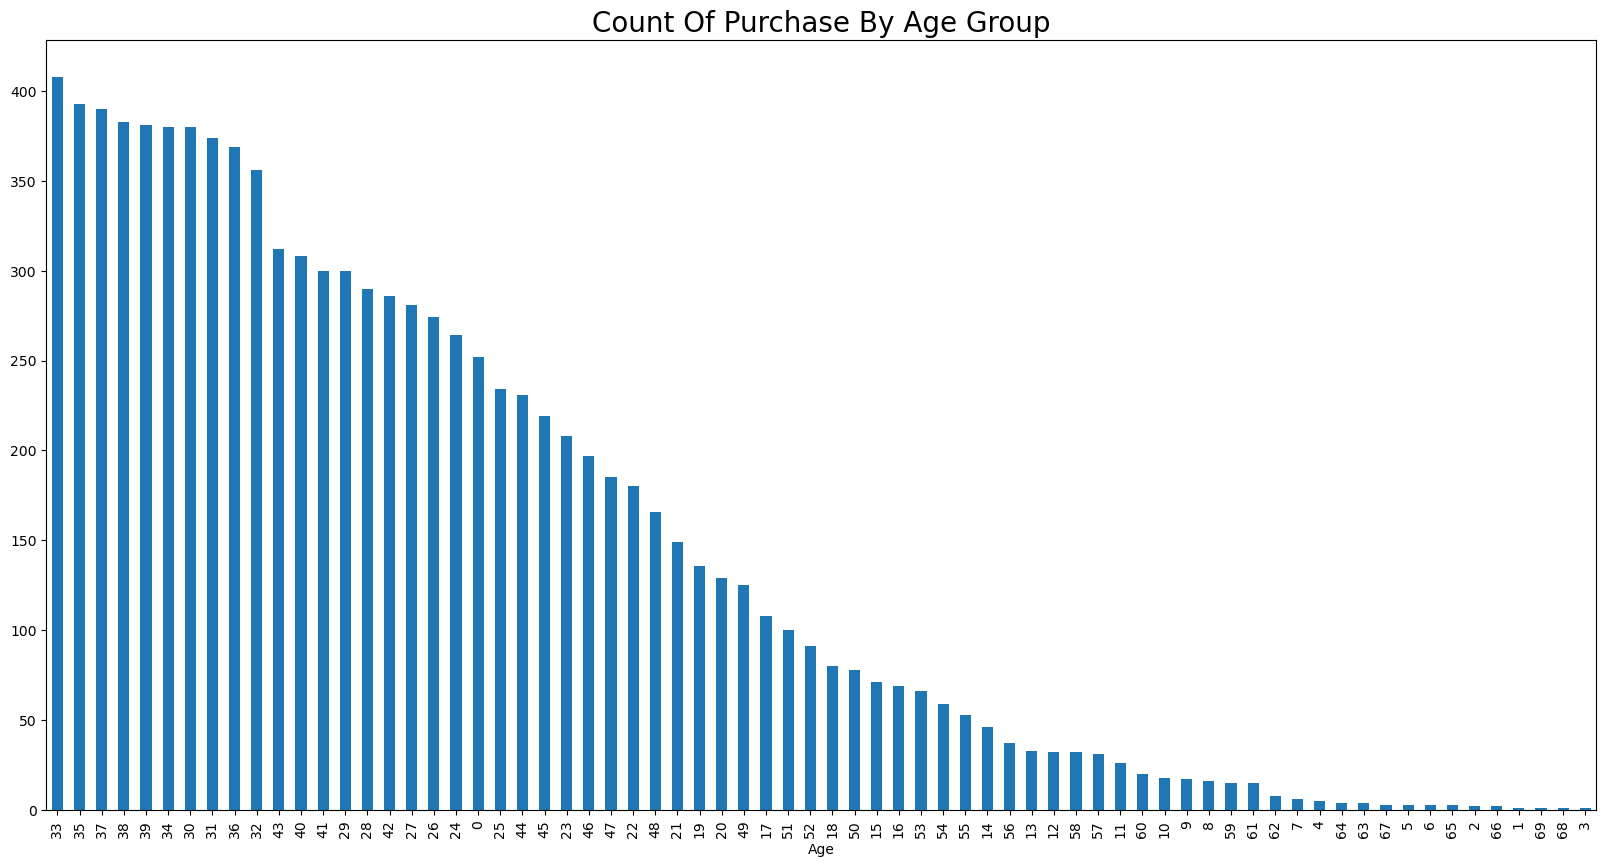

In [ ]:
# Count of purchase by age group

customer_data["Age"].value_counts().plot(kind = "bar", figsize = (20,10))
plt.title("Count Of Purchase By Age Group", size = 20)
plt.show()

# Customers within the age of 30 to the age of 40 tends to have more purchase history with the company, one could  focus advertisement specifically on this
# Age range to generate more sales, but to avoid being bais, there are certain age that also tends to have more transaction history with the company,like people
# in their 20s and 40s also has more sales than customers in their 60s, we could try to focus the advert on people between the age of 24 to 45

# Top ten Age group by purchase

# 33,35,37,36,34,31,32,38,39,30

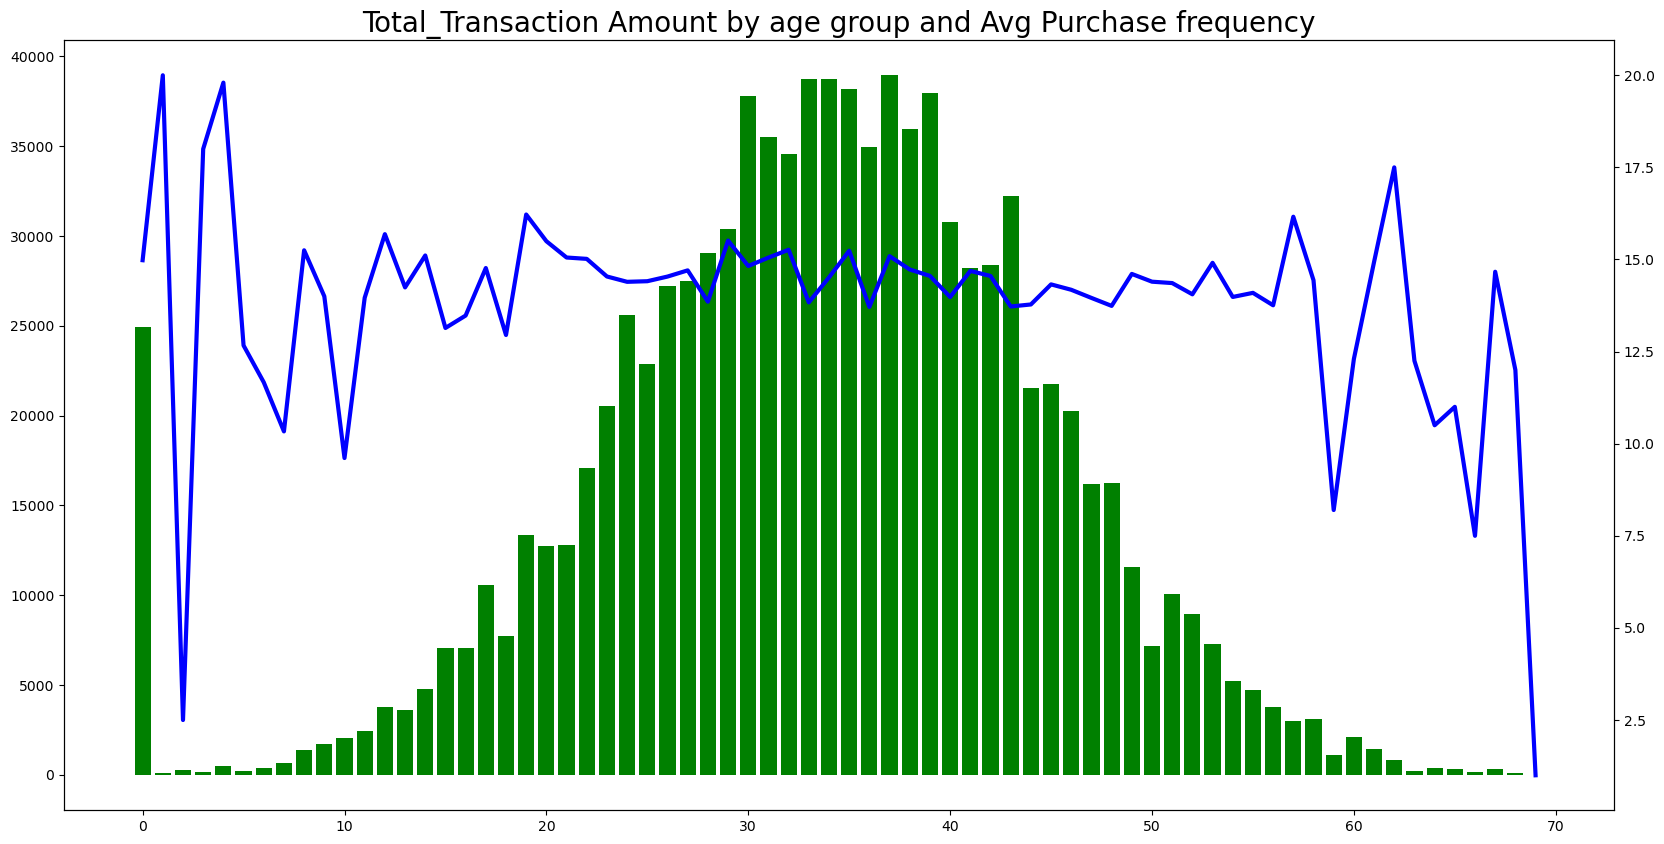

In [ ]:
x_axis = customer_data.groupby("Age")["Purchase_Frequency"].mean()
x_axis_2 = customer_data.groupby("Age")["Transaction_Amount"].sum()
y_axis = customer_data.groupby("Age")["Transaction_Amount"].sum().index

fig, ax1 = plt.subplots(figsize = (20,10))
ax2 = ax1.twinx()
ax1.bar(y_axis,x_axis_2, color = "g")
ax2.plot(y_axis,x_axis,"b-",lw=3 )
plt.title("Total_Transaction Amount by age group and Avg Purchase frequency", size = 20)
plt.show()

# THe Average purchase frequency has little to nothing to do with the Total Transaction Amount

# Looking into this chart , we can also see that the total transaction amount rose starting from the age of 24 to the age of 45 where the total transaction
# amount started declining, which still proves our first point of the range where we can invest

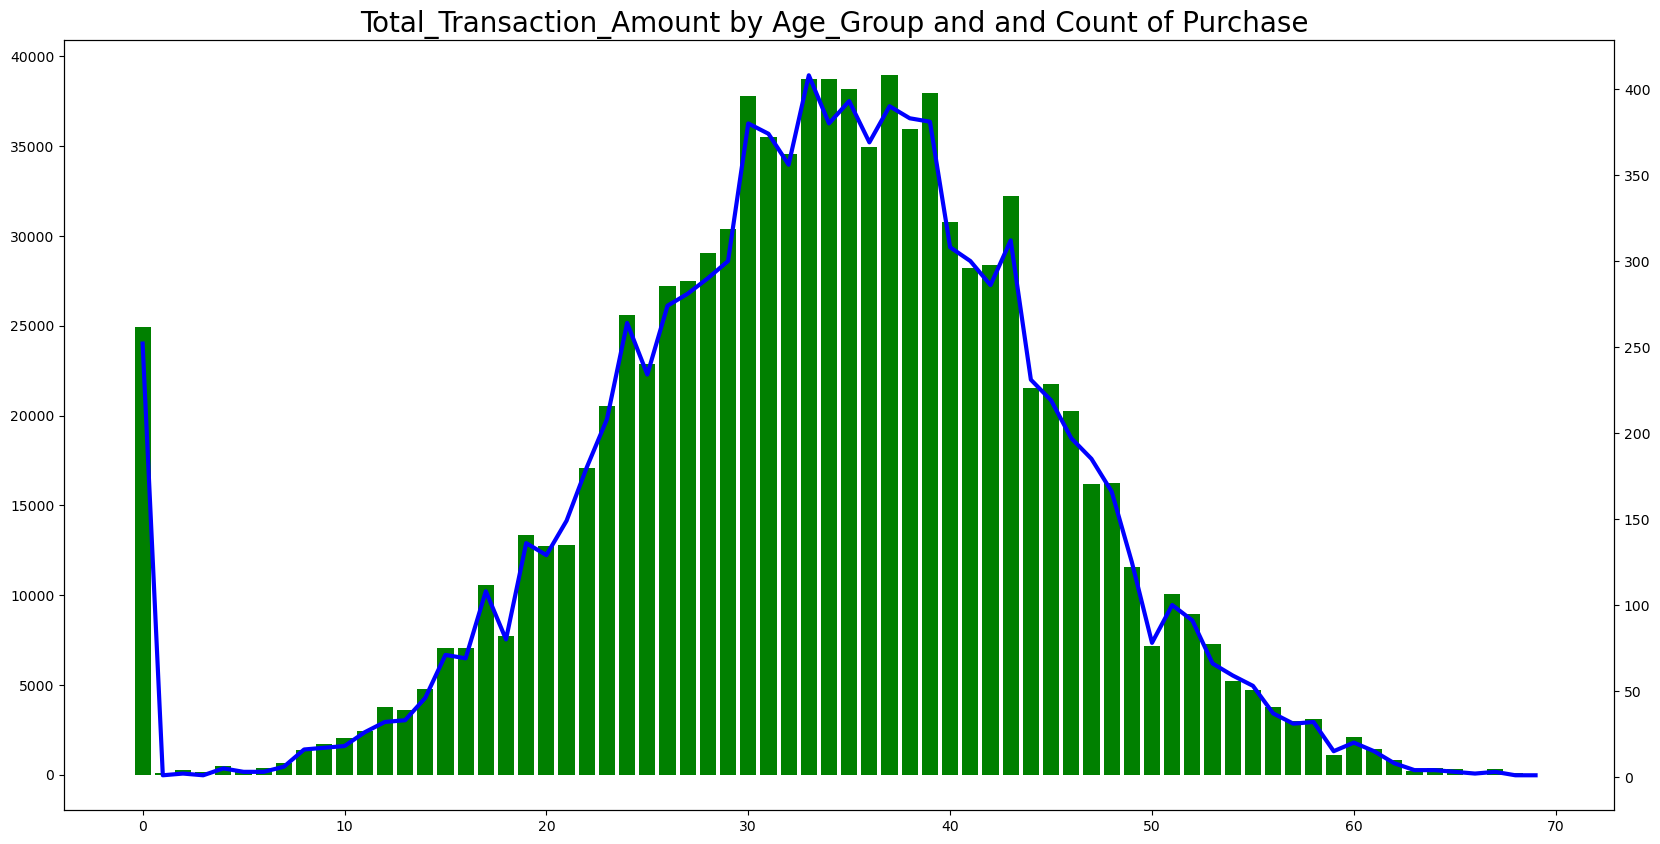

In [ ]:
x_axis = customer_data.groupby("Age")["Age"].count()
x_axis_2 = customer_data.groupby("Age")["Transaction_Amount"].sum()
y_axis = customer_data.groupby("Age")["Transaction_Amount"].sum().index

fig, ax1 = plt.subplots(figsize = (20,10))
ax2 = ax1.twinx()
ax1.bar(y_axis,x_axis_2, color = "g")
ax2.plot(y_axis,x_axis,"b-",lw = 3)
plt.title("Total_Transaction_Amount by Age_Group and and Count of Purchase ", size =  20)
plt.show()


# From this we can see that, the more count of purchase we have by different age_group, the higher the overall Transaction amount by those Age_group,

# Which still leads us back to the age group that are in most demands of the companies product, which is from the age of 24, 45, another thing we should keep
# In mind is that we cannot neglect sales generated from other age_group as well so to avoid bais,it would favor the company to find a way to relate the 
# advert planned to other age group as well but also making the above stated age group as the main focus of advertisement and the target audience 

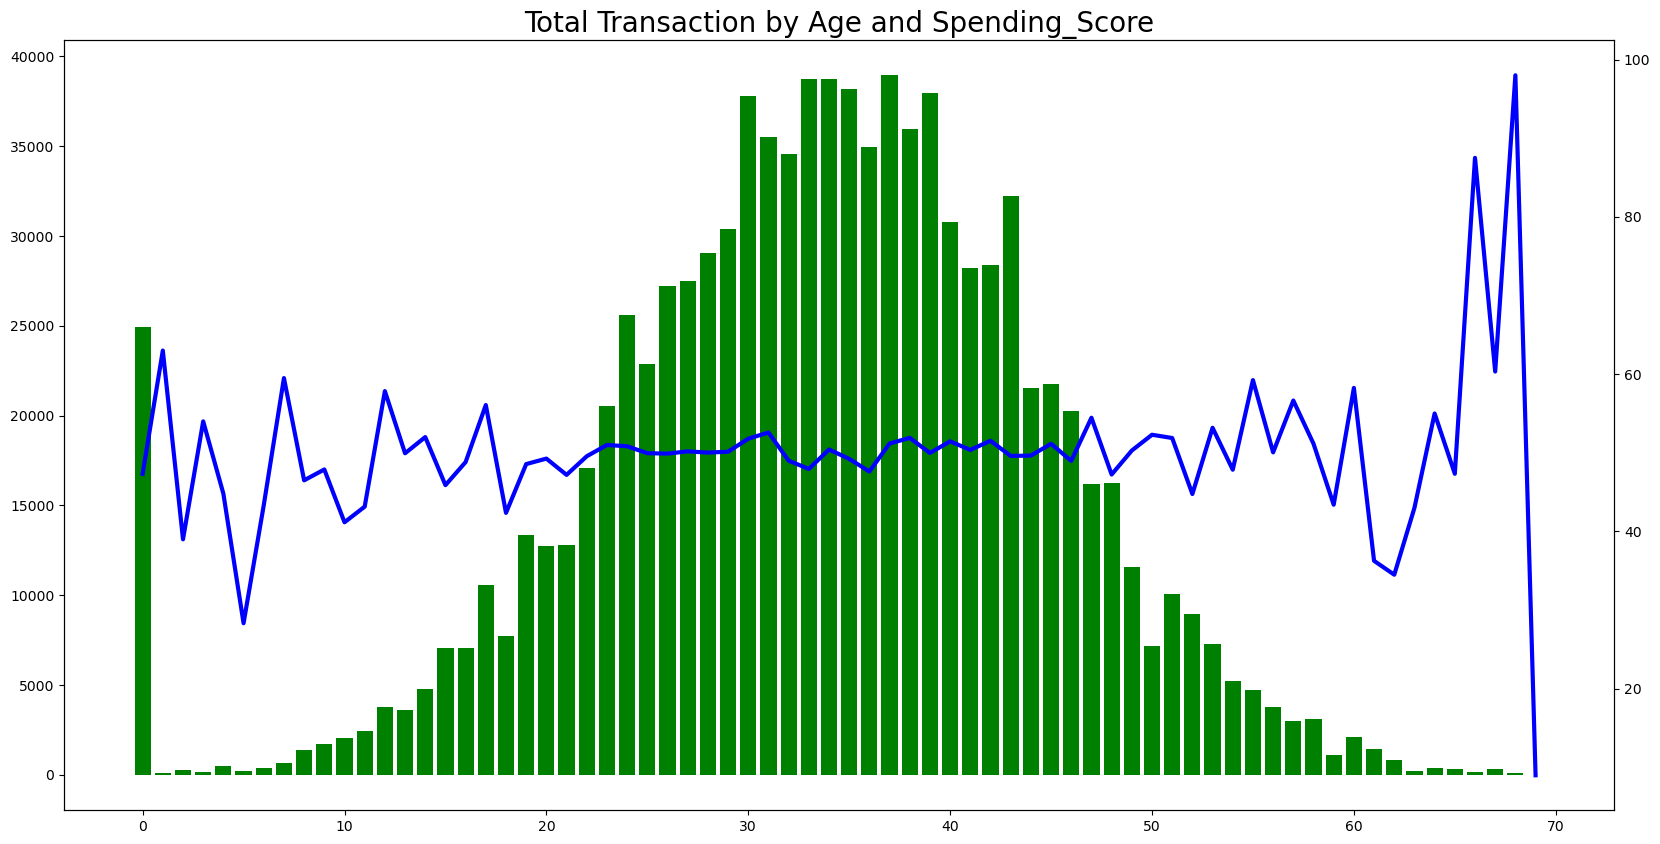

In [ ]:
x_axis = customer_data.groupby("Age")["Spending_Score"].mean()
x_axis_2 = customer_data.groupby("Age")["Transaction_Amount"].sum()
y_axis = customer_data.groupby("Age")["Transaction_Amount"].sum().index

fig, ax1 = plt.subplots(figsize = (20,10))
ax2 = ax1.twinx()
ax1.bar(y_axis,x_axis_2, color = "g")
ax2.plot(y_axis,x_axis,"b-",lw= 3)
plt.title("Total Transaction by Age and Spending_Score", size = 20)
plt.show()

# THe Volume of customers spending score has little to nothing to do with the the overall_Transaction_amount but we were able to discover that the age range
# 24 - 45 has relatively the same spending score from the ranging between 45-55

Recommendation


From what we discovered from our dataset, we would make the main focus of the upcoming advertisment be between the age range of 24 to 45 years old.